<a href="https://colab.research.google.com/github/ollihansen90/Mathe-SH/blob/main/Mathe%5ESH_Prog_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathe^SH Python-Kurs, Woche 10


# Fragen?
Solltet ihr Fragen zum Code oder Probleme mit Colab haben, schickt uns gerne eine Mail:

*   hohansen@inb.uni-luebeck.de
*   maren.wieder@student.uni-luebeck.de
*   friederike.meissner@student.uni-luebeck.de
*   dustin.haschke@student.uni-luebeck.de

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Plotten von Punkten und Linien

Wollt ihr einmal keine vollständige Funktion plotten, sondern einzelne Datenpunkte, habt ihr hierzu zwei verschiedene Methoden. Entweder verwendet ihr ```plt.scatter()``` oder ```plt.plot()```. Hierbei ist ```scatter``` generell einfacher, da ihr einfach nur eure beiden Arrays mit Werte für x und y übergeben müsst.

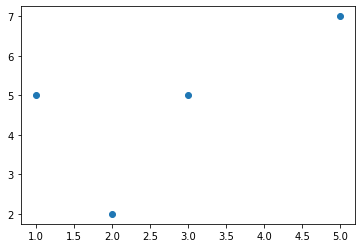

In [ ]:
x = [1,3,5,2]
y = [5,5,7,2]

plt.scatter(x,y)
plt.show()

Mit Hilfe von ```color``` und ```marker``` könnt ihr noch beliebig die Form und Farbe eurer Punkte verändern. Ihr benötigt ```s``` umd die Größe zu kontrollieren und ```alpha``` dafür, wie durchscheinend die Punkte sein sollen. Letzteres ist sehr praktisch, wenn sich Punkte potentiell überlappen könnten.

Testet doch einmal beliebig viele der folgenden Eingaben für Marker aus: 

".", ",", "o", "v", "^", "<", ">", "1", "2", "3", "4", "8", "s", "p", "P", "*", "h", "H", "+", "x", "X", "D", "d", "|", "_", 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11

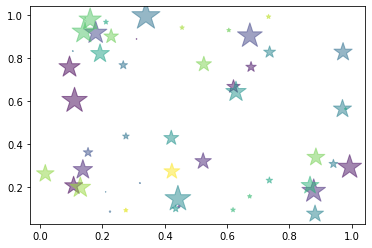

In [ ]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  

plt.scatter(x, y, s=area, c=colors, marker = "*", alpha=0.5)
plt.show()

Um alterntiv ```plt.plot()``` verwenden zu können, müsst ihr direkt den Marker spezifizieren, da die einzelnen Punkte ansonsten verbunden werden. Natürlich könnt ihr somit auch ```plt.plot()``` bewusst dazu benutzen, einzelne Linien oder Formen zu zeichnen.

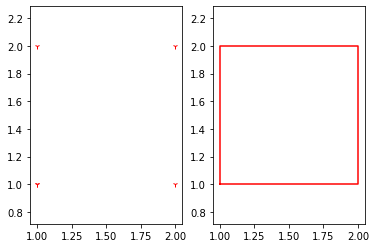

In [ ]:
x = [1,1,2,2,1]
y = [1,2,2,1,1]

plt.subplot(1,2,1)
plt.plot(x, y, "1", c = "red",)
plt.axis("equal")

plt.subplot(1,2,2)
plt.plot(x, y, c = "red",)
plt.axis("equal")

plt.show()

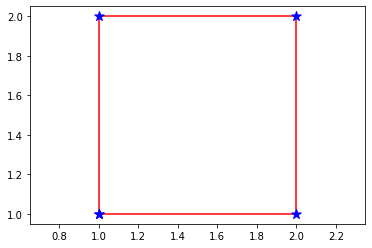

In [ ]:
x = [1,1,2,2,1]
y = [1,2,2,1,1]

plt.scatter(x, y, s = 100, marker = "*", color = "blue", zorder = 2)
plt.plot(x, y, c = "red", zorder = 1)
plt.axis("equal")

plt.show()

## Transformationsmatrizen

Mit den folgenden Funktionen könnt ihr bereits erzeugte Figuren (als ```obj``` übergeben) drehen, spiegeln, in der Größe verändern und im Plot verschieben. Diese Transformationen der Arrays basieren jeweils auf einer Matrix-Matrix-Multiplikation und können daher beliebig kombiniert werden. 

Bei der Übergabe eines Winkels ```grad``` ist zu beachten, dass dieser im Bogenmaß und *nicht* im Gradmaß angegeben werden muss. Es gilt $x = \frac{\pi \cdot \alpha}{180°}$ für $\alpha$ im Gradmaß und $x$ im Bogenmaß. Wollt ihr also eine Figur um 90° drehen, entspricht ```grad = np.pi/2```, denn $x = \frac{\pi \cdot 90°}{180°} = \frac{\pi}{2}$.

<img src=https://www.thetawelle.de/wp-upload/einheitskreis_alles_550.png width="40%"/>

In [ ]:
# Drehung gegen den Uhrzeigersinn um grad in Bogenmaß (abhängig von Pi)
def dreh_gegen(obj,grad):
    matrix = np.array([[np.cos(grad), -np.sin(grad)],
                     [np.sin(grad), np.cos(grad)]])
    return np.matmul(matrix,obj)
    
# Drehung mit dem Uhrzeigersinn um grad in Bogenmaß (abhängig von Pi)
def dreh_mit(obj,grad):
    matrix = np.array([[np.cos(grad), np.sin(grad)],
                     [-np.sin(grad), np.cos(grad)]])
    return np.matmul(matrix,obj)
    
# Spiegelung an Ursprungsgeraden mit grad zur positiven x-Achse
def spiegel(obj,grad):
    matrix = np.array([[np.cos(2*grad), np.sin(2*grad)],
                     [np.sin(2*grad), -np.cos(2*grad)]])
    return np.matmul(matrix,obj)

# Veranschaulichung
# Plot der Ursprungsgeraden mit Winkel grad
def plot_ursprung(grad):
    x = np.linspace(-5,5)
    y = 4*grad/np.pi*x
    plt.plot(x,y)

# Größenveränderung um faktor
# abs(faktor) > 1: Vergrößerung
# abs(faktor) < 1: Verkleinerung
def max_min(obj,faktor):
    matrix = np.array([[faktor,0],[0,faktor]])
    return np.matmul(matrix,obj)
    
# Verschiebung um den Vektor (a,b)
def verschieb(obj,a,b):
    return (obj.T+np.array([a,b])).T

# Der schönste Schneemann

(2, 154)


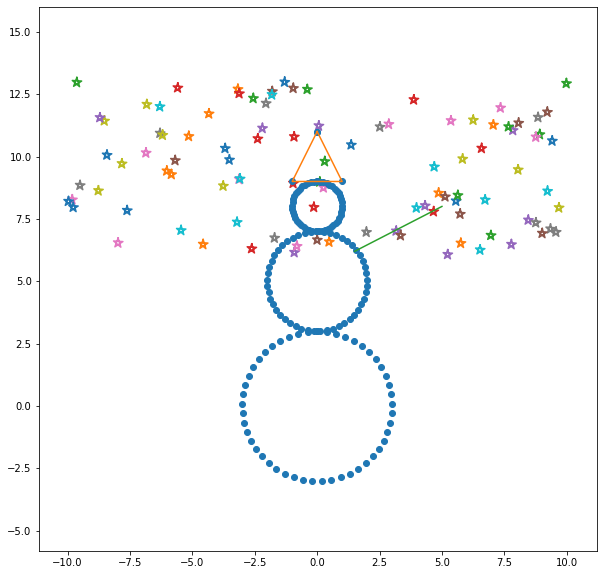

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def kreis(radius=1):
    x = np.linspace(0,2*np.pi)
    data = np.column_stack((np.sin(x), np.cos(x)))
    return radius*data.T

def dreieck(g, h):
    data = np.array([[0,0], [-g/2, -h], [g/2, -h], [0,0]])
    return data.T

def linie(start, stopp):
    return np.stack((start, stopp)).T   

def rechteck(a=1, b=1):
    data = np.array([[0,0],[a,0], [a,b], [0,b], [0,0]])
    return data.T

def verschiebe(obj, a, b):
    translation = np.array([a,b])
    return (obj.T+translation).T

def setzezusammen(objs):
    data = objs[0]
    for i in range(1,len(objs)):
        data = np.column_stack((data, objs[i]))
    return data

def stern(radius=1):
    data = kreis(radius)[:,::10][:,[0,2,4,1,3,0]]
    return data

k = kreis(3)
k2 = verschiebe(kreis(2), 0, 5)
k3 = verschiebe(kreis(1), 0, 8)
hut = verschiebe(dreieck(2, 2), 0, 11)
schneemann = setzezusammen([k, k2, k3, hut])
armlinks = linie(np.array([1.5,6.2]), np.array([5,8]))
print(schneemann.shape)
plt.figure(figsize=[10,10])
for i in range(100):
    z = np.array([20, 7])*np.random.rand(2)+np.array([-10,6])
    s = verschiebe(stern(0.2), *z)
    plt.plot(s[0], s[1])
plt.plot(schneemann[0], schneemann[1], "o")
plt.plot(hut[0], hut[1])
plt.plot(armlinks[0], armlinks[1])
plt.axis("equal")
plt.show()

**Vom Winde verweht**

Leider ist unser wunderschöner Schneemann, den du siehst, wenn du den Code über diesen Text ausführst, in einer stürmischen Nacht vollkommen auseinandergefallen.

Schaffst du es ihn wiederzusammenzusetzen? Und besorgst du ihm auch noch ein paar neue Sterne?


*Hinweise:*

>Lese dir insbeondere die Beschriftungen der Variablen, Funktionen usw. im Code gut durch. Sie geben dir gute Anhaltspunkte dafür, was wofür zuständig sein könnte. Im Zweifelsfalle können dir auch die Dokumentation oder die alten Python-Kurse weiterhelfen.

>Sollte dein Code mal nicht mehr funktionieren, hast du oben ja noch einen Schnappschuss davon, wie toll er gestern noch aussah.

>Versuche so wenig wie möglich dich an dem alten Code zu orientieren, denn vielleicht bekommst du ja einen noch tolleren hingezaubert bzw. programmiert!

(2, 154)


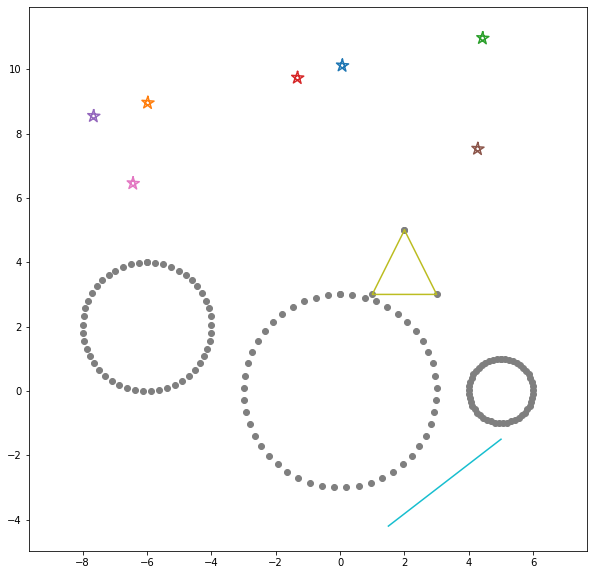

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def kreis(radius=1):
    x = np.linspace(0,2*np.pi)
    data = np.column_stack((np.sin(x), np.cos(x)))
    return radius*data.T

def dreieck(g, h):
    data = np.array([[0,0], [-g/2, -h], [g/2, -h], [0,0]])
    return data.T

def linie(start, stopp):
    return np.stack((start, stopp)).T   

def rechteck(a=1, b=1):
    data = np.array([[0,0],[a,0], [a,b], [0,b], [0,0]])
    return data.T

def verschiebe(obj, a, b):
    translation = np.array([a,b])
    return (obj.T+translation).T

def setzezusammen(objs):
    data = objs[0]
    for i in range(1,len(objs)):
        data = np.column_stack((data, objs[i]))
    return data

def stern(radius=1):
    data = kreis(radius)[:,::10][:,[0,2,4,1,3,0]]
    return data

k = kreis(3)
k2 = verschiebe(kreis(2), -6, 2)
k3 = verschiebe(kreis(1), 5, 0)
hut = verschiebe(dreieck(2, 2), 2, 5)
schneemann = setzezusammen([k, k2, k3, hut])
armlinks = linie(np.array([1.5,-4.2]), np.array([5,-1.5]))
armlinks = linie(np.array([1.5,-4.2]), np.array([5,-1.5]))
print(schneemann.shape)
plt.figure(figsize=[10,10])
#plt.plot(k[0], k[1])
#plt.plot(k2[0], k2[1])
#plt.plot(k3[0], k3[1])
for i in range(7):
    z = np.array([20, 7])*np.random.rand(2)+np.array([-10,6])
    s = verschiebe(stern(0.2), *z)
    plt.plot(s[0], s[1])
plt.plot(schneemann[0], schneemann[1], "o")
plt.plot(hut[0], hut[1])
plt.plot(armlinks[0], armlinks[1])
plt.axis("equal")
plt.show()

###Zusatzaufgabe

Unser Schneemann hat die Feiertage über ziemlich viele Schneehäppchen von der kalten Platte verspeist und sich eine komplett neue, noch dickere Schneekugel angefuttert.

Kannst du sie ihm einzeichnen?

Außerdem hast du zu Weihnachten endlich den ersehnten zweiten Besen geschenkt bekommen.

Magst du deinen Schneemann noch einen schicken zweiten Arm geben, sodass er sich noch mehr freuen kann?

#Der Weihnachtswald

Nachfolgend soll mit ```for``` oder ```while```-Schleifen und der ```print```-Funktion ein Weihnachtswald erstellt werden.

Dieser soll aus Bäumen aus dem ```#```-Symbol bestehen. Jeder Baum ist durch seine Höhe definiert.


> Die Baumkrone soll dabei der vorgegebenenen Höhe entsprechen.
Dabei wird diese in jeder Zeile um 2 Zeichen breiter.


>Der Stumpf ist ein Quadrat und befindet sich mittig unterhalb der Krone. Die Seitenlänge des Stumpfes ist 2*(Höhe//4)+1 wobei ```//``` eine Teilung mit Abrundung angibt)


So sieht z.B. ein 6er Baum aus:

In [ ]:
print("     #     ")    # Die Krone ist 1                                   1x   
print("    ###    ")    #               2                                   3x
print("   #####   ")    #               3                                   5x
print("  #######  ")    #               4                                   7x
print(" ######### ")    #               5                                   9x
print("###########")    #               6 Blöcke hoch, symmetrisch und aus 11x dem  #-Symbol
print("    ###    ")
print("    ###    ")    # Der quadratische Stumpf hat eine Seitenlänge von 
print("    ###    ")    # 2*(6//4)+1 = 2*1+1 = 3 bzw. 3x3 Blöcken

     #     
    ###    
   #####   
  #######  
 ######### 
###########
    ###    
    ###    
    ###    


Nachfolgend ist nun die Liste ```groesse``` gegeben.

Verwende diese Größen für die Bäume in deinem Weihnachtswald.

In [ ]:
groesse=[6,13,5,6,15,7,11]

# Hier folgt dein Code:

##Zusatzaufgabe

Schaffst du es die Bäume nicht nur untereinander, sondern auch nebeneinander mit dem unteren Ende des Stammes auf einer Höhe zu plazieren?